# New York City Green Taxi Tip Prediction 


## Introduction:

write something to talk about the green taxi here.



For more information, read: 
https://en.wikipedia.org/wiki/Boro_taxi

In this project, we will perform stepwise data analysis on the dataset and try to explore the following things:



## Required Tools

The following libraries are required for this project:
1. pandas


In [4]:
import pandas as pd

## Part 1 Data Collection

First we can find the direct link for the October 2017 NYC green taxi data by reading the html website source code (https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv). 

These data is collected from New York City Taxi and Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml). 

Then we load the csv file into the panda dataframe. 

The data contains 1.5 M rows and 19 columns.

In [6]:
year, month = 2017, 10
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv" % (year,month)
raw_data = pd.read_csv(url)

In [7]:
raw_data.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
222745,2,2017-10-08 13:14:28,2017-10-08 13:23:57,N,1,225,63,1,2.49,10.0,0.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1.0
608651,2,2017-10-21 14:51:56,2017-10-21 14:58:47,N,1,243,244,1,0.87,6.0,0.0,0.5,0.00,0.0,NaN,0.3,6.80,2,1.0
739257,2,2017-10-26 03:56:19,2017-10-26 04:04:04,N,1,82,173,1,1.93,8.5,0.5,0.5,0.00,0.0,NaN,0.3,9.80,2,1.0
524975,2,2017-10-18 21:10:04,2017-10-18 21:23:40,N,1,145,223,5,3.12,12.0,0.5,0.5,2.66,0.0,NaN,0.3,15.96,1,1.0
305579,1,2017-10-11 17:24:21,2017-10-11 17:34:26,N,1,129,70,1,2.80,10.5,1.0,0.5,1.23,0.0,NaN,0.3,13.53,1,1.0


In [11]:
print("Number of rows: ", raw_data.shape[0],"\nNumber of columns: ", raw_data.shape[1])

Number of rows:  925737 
Number of columns:  19


In [4]:
raw_data.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

It contains following informations, such as pickup/dropoff date, time, and location, trip distance, fair amount in differnt subjects, and payment types.

The detailed explaination for the columns can be found at 
(http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf)

## Part 2 Data Processing

First we can find the direct link for the October 2017 NYC green taxi data by reading the html website source code (https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_%4d-%02d.csv). 

These data is collected from New York City Taxi and Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml). 

Then we load the csv file into the panda dataframe. 

The data contains 1.5 M rows and 19 columns.

In [5]:
col_to_count = raw_data.columns[[0,3,4,5,6,7,-2,-1]]
for col in col_to_count:
    print(col)
    print(raw_data[col].value_counts())
    print()

VendorID
2    1169099
1     325827
Name: VendorID, dtype: int64

Store_and_fwd_flag
N    1486192
Y       8734
Name: Store_and_fwd_flag, dtype: int64

RateCodeID
1     1454464
5       33943
2        4435
3        1117
4         925
6          36
99          6
Name: RateCodeID, dtype: int64

Pickup_longitude
 0.000000     2110
-73.844299     886
-73.844292     814
-73.844276     801
-73.844315     798
-73.939163     784
-73.844269     755
-73.844322     718
-73.844307     715
-73.939201     707
-73.939178     702
-73.939156     692
-73.939140     662
-73.844284     649
-73.939194     638
-73.939125     621
-73.939095     618
-73.844330     616
-73.939110     612
-73.844254     606
-73.939224     599
-73.939133     580
-73.939072     571
-73.939148     557
-73.939240     552
-73.957619     543
-73.939217     542
-73.844345     540
-73.939079     539
-73.957588     533
              ... 
-74.220581       1
-73.766144       1
-73.772400       1
-74.030891       1
-73.771858       1
-74.0238

In [6]:
df = raw_data.copy()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

Let us check and dimension of this dataset and answer the first question.

In [8]:
print(df.shape)
print(df.columns)

(1494926, 21)
Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')


### check trip distance column and see if there are some problems.

In [9]:
df = df[df['Trip_distance'] > 0]

In [10]:
df[df['Trip_distance'] > 100]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
478080,2,2015-09-10 21:15:00,2015-09-11 00:52:07,N,5,-73.871719,40.771744,-76.121590,42.799343,1,...,300.00,0.0,0.0,77.44,9.75,NaN,0.0,387.19,1,2.0
516757,2,2015-09-11 17:22:50,2015-09-11 20:39:48,N,1,-73.937775,40.800926,-72.269753,40.928116,1,...,316.00,1.0,0.5,0.00,0.00,NaN,0.3,317.80,2,1.0
885097,2,2015-09-18 20:21:27,2015-09-18 22:36:04,N,1,-73.958954,40.819847,-72.258629,40.930805,1,...,258.50,0.5,0.5,0.00,0.00,NaN,0.3,259.80,2,1.0
944537,1,2015-09-19 18:49:29,2015-09-19 21:06:23,N,1,-73.961609,40.805958,-72.261024,41.917648,1,...,342.50,0.0,0.5,102.95,0.00,NaN,0.3,446.25,1,1.0
1077032,2,2015-09-22 10:30:53,2015-09-22 12:28:59,N,1,-73.898193,40.749580,-73.899033,40.746319,1,...,271.50,0.0,0.5,0.00,15.29,NaN,0.3,287.59,2,1.0
1282594,2,2015-09-26 17:23:52,2015-09-27 00:00:00,N,5,-73.803436,40.677845,-73.840210,40.719513,2,...,180.00,0.0,0.5,18.08,0.00,NaN,0.3,198.88,1,1.0
1321961,1,2015-09-27 03:13:48,2015-09-27 03:24:12,N,1,-73.937164,40.804386,-73.901382,40.819443,1,...,1.25,0.5,0.5,0.00,0.00,NaN,0.3,2.55,2,1.0
1416994,1,2015-09-29 10:45:52,2015-09-29 16:55:23,N,1,-73.931129,40.693161,-73.936172,40.685581,2,...,389.00,0.0,0.5,0.00,41.08,NaN,0.3,430.88,1,1.0
1432692,1,2015-09-29 17:01:17,2015-09-29 17:01:19,N,3,-73.936172,40.685581,-73.936172,40.685581,1,...,20.00,1.0,0.0,6.35,0.00,NaN,0.3,27.65,1,1.0
1457965,2,2015-09-30 09:42:56,2015-09-30 09:42:56,N,5,-73.914627,40.871475,-73.912315,40.872181,1,...,18.00,0.0,0.0,0.00,0.00,NaN,0.3,18.30,2,1.0


In [11]:
print ("The number of zero trip distance is:", df[df['Trip_distance'] == 0].shape[0])
print ("The percentage of zero trip distance is:", df[df['Trip_distance'] == 0].shape[0] * 100.0/df.shape[0])

The number of zero trip distance is: 0
The percentage of zero trip distance is: 0.0


This corresponds to about 1.23% of the total data. Let us play around with the data so we have some general idea about the data and how to clean and format the data. After playing around for quite a while (details skipped here), Let us do some cleaning and formatting work. 
    ### Cleaning and formatting data

In [12]:
datetime_cols = df.columns[1:3]
format_dt = "%Y-%m-%dT%H:%M:%S"
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format = format_dt)
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                       float64
dtype: object

From the log file, it seems that we only deleted or changed a very small amount of data. The data is relatively clean. 

## Question 3.1

### Report mean and median trip distance grouped by hour of day.

Next we will create a new column hour based on pickup time. Then we can do some aggregation like mean and median distance by hour. 

In [13]:
# apply: apply a function to list elements
# lambda function: python 

df['hour'] = df['lpep_pickup_datetime'].apply(lambda x: x.hour)

In [14]:
df[['lpep_pickup_datetime','hour']].sample(10)

,lpep_pickup_datetime,hour
142925,2015-09-04 08:15:35,8
893148,2015-09-18 22:57:11,22
1077938,2015-09-22 10:35:14,10
847849,2015-09-18 06:48:53,6
1380408,2015-09-28 13:26:41,13
859919,2015-09-18 12:41:00,12
287404,2015-09-06 19:00:32,19
1036445,2015-09-21 10:11:32,10
53151,2015-09-02 10:17:23,10
751094,2015-09-16 08:03:12,8


In [15]:
#numpy

In [16]:
distance_by_hour = df.groupby('hour')['Trip_distance'].agg([np.mean, np.median])  # consistent conclusion
distance_by_hour

,mean,median
hour,,
0,3.150602,2.23
1,3.054612,2.16
2,3.091807,2.19
3,3.261706,2.26
4,3.584065,2.40
5,4.214483,2.98
6,4.134494,2.90
7,3.330973,2.20
8,3.088413,2.00


To visually observe the trend, let us plot the median and mean average distance as the function of hour of the day.

In [17]:
import os
if not os.path.exists("figs"):
    os.makedirs("figs")

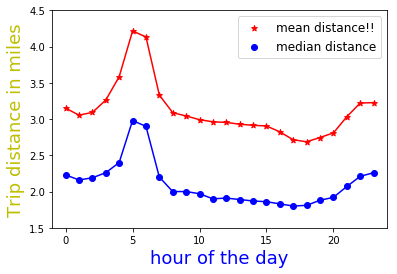

In [18]:
plt.scatter(range(24), distance_by_hour["mean"], c ='r',label = "mean distance!!", marker="*") #  Ctrl + / to comment/uncomment
plt.scatter(range(24), distance_by_hour['median'],c ='b',label = "median distance")
plt.plot(distance_by_hour['mean'],c ='r',label = "")
plt.plot(distance_by_hour['median'],c ='b',label = "")
legend = plt.legend(loc='upper right', fontsize='large')
plt.axis([-1, 24, 1.5, 4.5])
plt.xlabel('hour of the day', fontsize = 18, color ="b")
plt.ylabel('Trip distance in miles', fontsize = 18, color = "y")
plt.savefig("figs/by_hour_distance.png", dpi = 100)
plt.show()

From this figure, it seems there is a peak of the average/median travel distance before the morning rushing hour.


After reading the fare rules, it seems the taxi will charge a flat rate for this trip. Let us verify it.

### LGA airport traffic

LGA airport green taxi traffic:
Terminal A :   Picking up 9  times  Dropping off 606  times
Dropoff mean fare is:  26.39  dollars. The dropoff mean distance is:  6.08  miles
Pickup mean fare is:  18.26  dollars. The pickup mean distance is:  8.14  miles

Terminal B :   Picking up 71  times  Dropping off 11328  times
Dropoff mean fare is:  25.51  dollars. The dropoff mean distance is:  6.14  miles
Pickup mean fare is:  32.93  dollars. The pickup mean distance is:  8.41  miles

Terminal C :   Picking up 69  times  Dropping off 5453  times
Dropoff mean fare is:  28.38  dollars. The dropoff mean distance is:  6.89  miles
Pickup mean fare is:  25.28  dollars. The pickup mean distance is:  7.15  miles

Terminal D :   Picking up 21  times  Dropping off 3161  times
Dropoff mean fare is:  28.12  dollars. The dropoff mean distance is:  6.82  miles
Pickup mean fare is:  36.05  dollars. The pickup mean distance is:  6.87  miles

LGA taxi traffic average distance is:  6.45  miles
LGA taxi traffic a

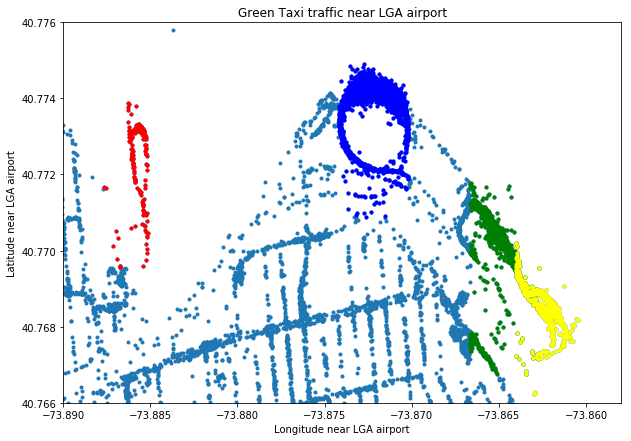

In [19]:
LGA_taxi = pd.DataFrame()
terminals = ["A", "B", "C", "D"]
colors = ["red",'blue','green','yellow']
LGA = [[40.772562, -73.885640], [40.773893, -73.872204],[40.769722, -73.864659],[40.768702, -73.862036]]  #LGA terminal coordinates
plt.figure(figsize=(10,7))
plt.scatter(df['Dropoff_longitude'], df['Dropoff_latitude'],marker = '.')
print( "LGA airport green taxi traffic:")
for i in range(len(LGA)):
    temp1 = df[(abs(df["Pickup_latitude"] - LGA[i][0]) < 0.003) & (abs(df["Pickup_longitude"] - LGA[i][1]) < 0.002)]
    temp2 = df[(abs(df["Dropoff_latitude"] - LGA[i][0]) < 0.003) & (abs(df["Dropoff_longitude"] - LGA[i][1]) < 0.002)]
    LGA_taxi = LGA_taxi.append(temp1)
    LGA_taxi = LGA_taxi.append(temp2)
    plt.scatter(temp2['Dropoff_longitude'], temp2['Dropoff_latitude'], color =colors[i],marker =".")
    print ("Terminal", terminals[i], ":   Picking up", temp1.shape[0], " times"," Dropping off", temp2.shape[0], " times" )
    print ("Dropoff mean fare is: ", "{0:.2f}".format(np.mean(temp2['Total_amount'])), " dollars. The dropoff mean distance is: ",\
          "{0:.2f}".format(np.mean(temp2['Trip_distance'])), " miles")
    print ("Pickup mean fare is: ", "{0:.2f}".format(np.mean(temp1['Total_amount'])), " dollars. The pickup mean distance is: ",\
          "{0:.2f}".format(np.mean(temp1['Trip_distance'])), " miles")
    print ()

LGA_count = LGA_taxi.shape[0]
LGA_avg_distance = np.mean(LGA_taxi['Trip_distance'])
LGA_avg_fare = np.mean(LGA_taxi['Total_amount'])

print ("LGA taxi traffic average distance is: ","{0:.2f}".format(LGA_avg_distance), " miles")
print ("LGA taxi traffic average fare is: ", "{0:.2f}".format(LGA_avg_fare), " dollars")
plt.xlim(-73.890, -73.858)
plt.ylim(40.766, 40.776)
plt.xlabel('Longitude near LGA airport')
plt.ylabel('Latitude near LGA airport')
plt.title("Green Taxi traffic near LGA airport")
plt.savefig("figs/LGA.png", dpi = 100)

The above figure is a plot of LGA airport traffic map. Four terminals we identified are marked with different colors. There is no overlap when I count the traffic.

Next, we do the same thing for JFK airport. Because JFK airport is farther away from the city, we do not need to break into terminals to get the traffic.

### JFK airport traffic

In [20]:
JFK = [40.646, -73.784]  #JFK terminal coordinates
Pickup_at_JFK = df[(abs(df["Pickup_latitude"] - JFK[0]) < 0.008) & (abs(df["Pickup_longitude"] - JFK[1]) < 0.01)]
Dropoff_at_JFK = df[(abs(df["Dropoff_latitude"] - JFK[0]) < 0.008) & (abs(df["Dropoff_longitude"] - JFK[1]) < 0.01)]
JFK_taxi = Pickup_at_JFK.append(Dropoff_at_JFK)
JFK_count = JFK_taxi.shape[0]
JFK_avg_distance = np.mean(JFK_taxi['Trip_distance'])
JFK_avg_fare = np.mean(JFK_taxi['Total_amount'])
print ("JFK total taxi traffic is: ", JFK_count, " times in September 2015")
print( "JFK taxi traffic average distance is: ","{0:.2f}".format(JFK_avg_distance), " miles")
print( "JFK taxi traffic average fare is: ", "{0:.2f}".format(JFK_avg_fare), " dollars")

JFK total taxi traffic is:  12771  times in September 2015
JFK taxi traffic average distance is:  13.95  miles
JFK taxi traffic average fare is:  48.67  dollars


To compare airport taxi data with general city data. Let us find the general NYC taxi metric.

In [21]:
NYC_count = df.shape[0]
NYC_avg_distance = np.mean(df['Trip_distance'])
NYC_avg_fare = np.mean(df['Total_amount'])

Let us make some pretty bar plots to compare the fares among JFK, LGA and general city traffic.

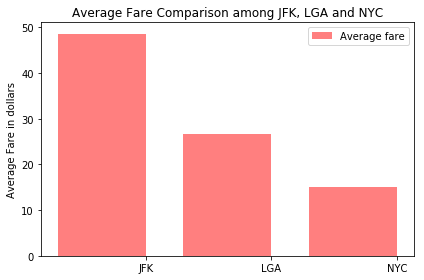

In [22]:
index = np.arange(3)
bar_width = 0.7
opacity = 0.5
rects1 = plt.bar(range(3), (JFK_avg_fare,LGA_avg_fare,NYC_avg_fare), bar_width, alpha=opacity, color='r', label='Average fare')
plt.ylabel('Average Fare in dollars')
plt.title('Average Fare Comparison among JFK, LGA and NYC')
plt.xticks(index + 0.5* bar_width, ('JFK', 'LGA', 'NYC'))
plt.legend()
plt.tight_layout()
plt.savefig("figs/average_fare.png")
plt.show()

Some general statistic about airport taxi traffic:

In [23]:
print ("JFK total taxi traffic is: ", JFK_count, "average fare is: ", \
      "{0:.2f}".format(JFK_avg_fare), "dollars,", "the average distance is:", "{0:.2f}".format(JFK_avg_distance), "miles"
)
print ("LGA total taxi traffic is: ", LGA_count, "average fare is: ", \
      "{0:.2f}".format(LGA_avg_fare), "dollars,", "the average distance is:", "{0:.2f}".format(LGA_avg_distance), " miles")
print ("The total NYC traffic is:", NYC_count, "average fare is: ", \
      "{0:.2f}".format(NYC_avg_fare), "dollars,", "the average distance is:", "{0:.2f}".format(NYC_avg_distance), " miles")

JFK total taxi traffic is:  12771 average fare is:  48.67 dollars, the average distance is: 13.95 miles
LGA total taxi traffic is:  20718 average fare is:  26.72 dollars, the average distance is: 6.45  miles
The total NYC traffic is: 1474334 average fare is:  15.02 dollars, the average distance is: 3.01  miles


The following is a traffic map near JFK. Terminals are easy to identify and well seperated from city traffic.

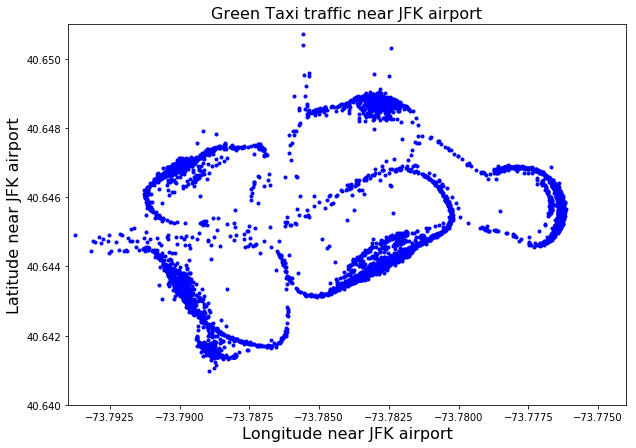

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(df['Dropoff_longitude'], df['Dropoff_latitude'], color = 'blue',marker='.')
plt.xlim(-73.794,-73.774)
plt.ylim(40.64,40.651)
plt.xlabel('Longitude near JFK airport', fontsize =16)
plt.ylabel('Latitude near JFK airport', fontsize =16)
plt.title("Green Taxi traffic near JFK airport", fontsize =16)
plt.savefig("figs/JFK.png",dpi = 100)
# several terminals are clearly to be seen from this plot.

### Summary about airport traffic:

There are 13 times more chance of dropping off than pickup for airport taxi trips. This is because green taxies are not allowed to pick up passgeners at airports unless it is prearranged. LGA has a heavier traffic than JFK maybe becuase there is direct metro-rail to JFK. JFK trips are longer and more expensive.

## Question 4

### 4A: Build a derived variable for tip as a percentage of the total fare.

Next we will create a column "Tip percentage" which is the percentage of tip amount in total amount (including tip). For example, if the total fare is 100 dollars (including the tip) and the tip is 20 dollars. This percentage will give you 20.

In [25]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'hour'],
      dtype='object')

In [26]:
df['total_without_tip'] = df['Total_amount'] - df['Tip_amount']
df['Tip_percentage'] = df['Tip_amount'] * 100 /df['total_without_tip']

In [27]:
df['Tip_percentage'].sample(10)

1346233    10.638298
226491      0.000000
380071      0.000000
888169      0.000000
1329846     0.000000
876576      0.000000
645486     20.325203
59085      12.875536
520744      0.000000
1488856     0.000000
Name: Tip_percentage, dtype: float64

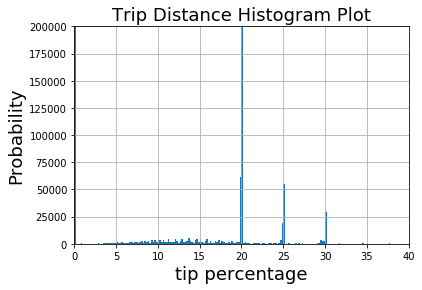

In [28]:
import matplotlib.pyplot as plt
temp = df['Tip_percentage'].dropna()
temp = temp[temp < 40]
plt.hist(temp, bins = 200)
plt.xlabel('tip percentage', fontsize =18)
plt.ylabel('Probability',fontsize =18)
plt.title('Trip Distance Histogram Plot',fontsize =18)
plt.axis([0, 40, 0, 200000])
plt.grid(True)
plt.savefig("figs/histogram_tip.png",dpi=100)
plt.show()
del temp

In [29]:
print ("The total number of records is:", df.shape[0])
print ("The total number of zero tip is:", df[df['Tip_amount'] == 0.0].shape[0])
ratio = df[df['Tip_amount'] == 0.0].shape[0]/(0.0 + df.shape[0])
print ("The percentage of tip that is zero is: ", "{0:.2f}%".format(ratio * 100))

The total number of records is: 1474334
The total number of zero tip is: 875833
The percentage of tip that is zero is:  59.41%


Our naive guess will be cash payers paied tips by cash and drivers did not report it. Is that true?

In [30]:
import collections
tip0 = collections.Counter(df[df['Tip_amount'] == 0.0]['Payment_type'])
tipnot0 = collections.Counter(df[df['Tip_amount'] != 0.0]['Payment_type'])
name = {1: "credit card", 2: "Cash",3: "No charge",4: "Disputed Trip",5: "Unknown"}
print ("The breakdown of the trips by payment codes:")
for key in tip0:
    print ("When the payment code is ", "{:13s}".format(name[key]),',\
    the number of zero tip is: ', "{:6d}".format(tip0[key]),'. The number of non-zero tip is: ', tipnot0[key])

The breakdown of the trips by payment codes:
When the payment code is  Cash          ,    the number of zero tip is:  773282 . The number of non-zero tip is:  2
When the payment code is  credit card   ,    the number of zero tip is:   94045 . The number of non-zero tip is:  598493
When the payment code is  Disputed Trip ,    the number of zero tip is:    4030 . The number of non-zero tip is:  2
When the payment code is  No charge     ,    the number of zero tip is:    4414 . The number of non-zero tip is:  4
When the payment code is  Unknown       ,    the number of zero tip is:      62 . The number of non-zero tip is:  0


So this is true. More than 99.9% cash payers either did not pay tips or the drivers did not report them. We also observe that there is a lot of zero-tip credit card transactions. How many are they?

This means even for credit card payers, there are about 12.6% people who did not pay tips.

Before we build a model to predict the tip percentage, let us do a histogram plot on this tip percentage and see if there are any patterns.

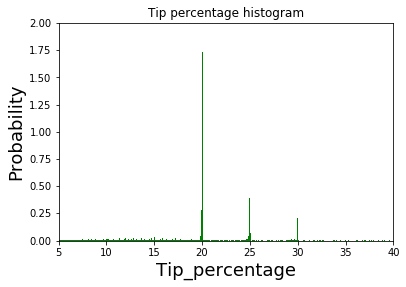

In [31]:
temp = df[df["Tip_percentage"] < 100]['Tip_percentage']
n, bins, patches = plt.hist(temp, 1000, normed=1, facecolor='green')
plt.xlabel('Tip_percentage', fontsize =18)
plt.ylabel('Probability', fontsize = 18)
plt.axis([5, 40, 0, 2])
plt.title("Tip percentage histogram")
plt.savefig("figs/tip_percentage.png", dpi = 200)
del temp

Except the expected 0% tip percentage, we also noticed huge peaks of modes in 20% tip, 25% tip and 30% tip. Passengers can press one of three values when they pay the driver.

Next question is: What is the relative likelihood that passengers would press one of these three ratios? Let us find it out.

In [32]:
total = df[df['Tip_amount'] != 0].shape[0]
tip20 = df[abs(df['Tip_percentage'] - 20.0) < 1].shape[0]  # 25% tip
tip25 = df[abs(df['Tip_percentage'] - 25.0) < 1].shape[0]   # 20% tip
tip30 = df[abs(df['Tip_percentage'] - 30.0) < 1].shape[0]  # 30% tip
print ("The total number of riders who payed tips are: ", total)
print ("The total number of riders who payed 20% tips are: ", tip20)
print ("The total number of riders who payed 25% tips are: ", tip25)
print ("The total number of riders who payed 30% tips are: ", tip30)
print ("The percentage of riders who used keypad to pay three three tips are: ","{0:.2f}%".format((tip20 + tip25 + tip30) /(total / 100.0)))

The total number of riders who payed tips are:  598501
The total number of riders who payed 20% tips are:  308740
The total number of riders who payed 25% tips are:  80828
The total number of riders who payed 30% tips are:  39704
The percentage of riders who used keypad to pay three three tips are:  71.72%


Therefore the ratios is roughly: 8:2:1 (20% : 25% : 30% tip), about 72% people who tip chose to use these three values.

Are there any modes on the tip amount? Let us find it out.

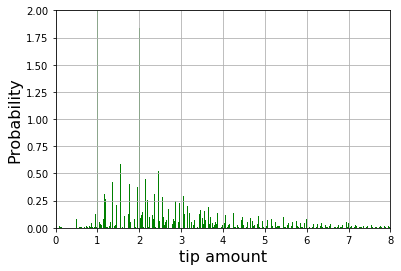

In [33]:
x = df[df['Tip_amount'] < 10]['Tip_amount']
n, bins, patches = plt.hist(x, 4000, normed=1, facecolor='green')
plt.xlabel('tip amount', fontsize =16)
plt.ylabel('Probability', fontsize = 16)
plt.axis([0, 8, 0, 2])
plt.grid(True)
plt.savefig("figs/tip_dollar.png",dpi =100)
del x

Notice there are clear peaks at 1, 2, 3, 4, 5, 6 dollars. How many are they?

In [34]:
tip1 = df[df['Tip_amount'] == 1.0].shape[0]   # 1 dollar tip
print ("The number of riders who paid 1 dollar as tip is: ", tip1)
tip2 = df[df['Tip_amount'] == 2.0].shape[0]   # 2 dollar tip
print ("The number of riders who paid 2 dollar as tip is: ", tip2)
tip3 = df[df['Tip_amount'] == 3.0].shape[0]   # 3 dollar tip
print ("The number of riders who paid 3 dollar as tip is: ", tip3)
tip4 = df[df['Tip_amount'] == 4.0].shape[0]   # 1 dollar tip
print ("The number of riders who paid 4 dollar as tip is: ", tip4)
tip5 = df[df['Tip_amount'] == 5.0].shape[0]   # 2 dollar tip
print ("The number of riders who paid 5 dollar as tip is: ", tip5)

The number of riders who paid 1 dollar as tip is:  48662
The number of riders who paid 2 dollar as tip is:  40406
The number of riders who paid 3 dollar as tip is:  16257
The number of riders who paid 4 dollar as tip is:  7182
The number of riders who paid 5 dollar as tip is:  8435


What is the percentage of people who did this?

In [35]:
print ("The percentage of riders who tip like this is: ","{0:.2f}%".format((tip1 + tip2 + tip3 + tip4 + tip5) /(total / 100.0)))

The percentage of riders who tip like this is:  20.21%


The general picture is: Drivers (>99%) did not report cash as their tips. 12.5% credit card papers either do not pay tips or the drivers took cash and did not report them. For the rest, 72% choose to press the button to pay 20%, 25% or 30% ( the ratio is roughly 8:2:1). Another 21% will pay a rounded dollar (1, 2, 3, 4, 5 or 6 dollars). The majority paid 1 or 2 dollars.  

### Step 2: Feature engineering

Since non-credit card transactions generally do not show tips. We can create a feature to show whether the transction is a credit card transaction.

Let us select features based on the correlation of the tip percentage with other features. Then we will choose the top 20 relavant features to build our models.


### Build a derived variable representing the average speed over the course of a trip.

First let us rebuild the data and calculate the average speed (in miles per hour) for each trip.

In [36]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'hour',
       'total_without_tip', 'Tip_percentage'],
      dtype='object')

In [37]:
df['trip_time_in_minutes'] = (df['Lpep_dropoff_datetime']- df['lpep_pickup_datetime']).apply(lambda x: x.total_seconds())/60
df['speed'] = df['Trip_distance'] / (df['trip_time_in_minutes']/60.0)

### Answer to question 5B and hypothesis:

The p-value is much less than 0.05. This means the average speed in different weeks are different. we should reject our null hypyothesis. The weekly average speed is not the same.There are many reasons that may cause this. For example, There is a labor day long weekend in September and taxi traffic should be bigger. Other factors, like major sports events, weather conditions can also be a factor.

## Question 5C:
### Can you build up a hypothesis of average trip speed as a function of time of day?

### Answer:
The average trip speed certainly depends on the time of the day. For example, during rush hours, we except a lower average speed. After dark, the average speed will increase and have a maximum before morning rush hour around 4am.

Since we have all the data available, we can group by the all the trips by the hour then aggredate the median speed for each hour. Finally we can plot this average speed as function of hour of the day and see if our hypothesis is valid.


In [38]:
df2 = df[df['speed'] < 100]  # filter NA, 3mi/0hr, 0.1mi/0,001hr

In [39]:
speed_by_hour = df2.groupby('hour')['speed'].agg([np.mean, np.median])
speed_by_hour.head(10)

,mean,median
hour,,
0,14.705745,13.426630
1,14.962171,13.739290
2,15.203420,13.980583
3,15.593803,14.235877
4,16.410222,14.676762
5,18.242751,16.224215
6,17.273457,15.359177
7,13.607806,12.076433
8,12.401777,11.052632


Next we plot the median speed as the hour of the day. It verified our hyphothesis.

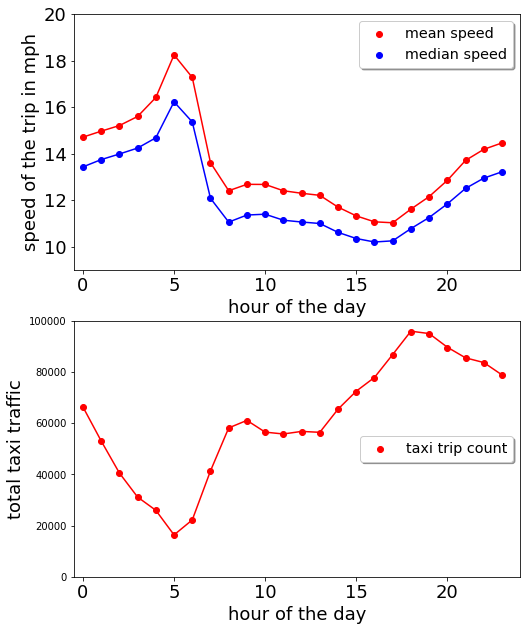

In [40]:
plt.figure(figsize=(8,16))
ax1 = plt.subplot(311)
plt.scatter(range(24), speed_by_hour["mean"], c ='r',label = "mean speed")
plt.scatter(range(24), speed_by_hour['median'],c ='b',label = "median speed")
plt.plot(range(24), speed_by_hour['mean'],c ='r',label = "")
plt.plot(range(24), speed_by_hour['median'],c ='b',label = "")
legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.axis([-0.5, 24, 9, 20])

plt.ylabel('speed of the trip in mph',fontsize=18)
plt.setp(ax1.get_xticklabels(),fontsize=18)
plt.setp(ax1.get_yticklabels(),fontsize=18)
plt.xlabel('hour of the day',fontsize=18)
ax2 = plt.subplot(312, sharex=ax1)
plt.scatter(range(24), df2.groupby('hour')['speed'].count(), c ='r',label = "taxi trip count")
legend = plt.legend(loc='right', shadow=True, fontsize='x-large')
plt.plot(range(24), df.groupby('hour')['speed'].count(), c ='r')
plt.axis([-0.5, 24, 0, 100000])
plt.setp(ax2.get_xticklabels(),fontsize=18)
plt.setp(ax2.get_yticklabels(),fontsize=10)
plt.xlabel('hour of the day',fontsize=18)
plt.ylabel('total taxi traffic',fontsize=18)
plt.savefig("figs/by_hour.png", dpi =100)
plt.show()

Our hyphothesis on speed is based on the total traffic as each hour. We can plot the total trips as each hour of the day. We found this is partially true. After midnight, the number of riders decreases and speed is getting higher. But after dinner, the number of riders increases but the average speed also increases compared to daytime. It seems speed increases because other traffic disappered after dinner. A great time to go out.  